In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
#### Visualizing Gini Impurity range


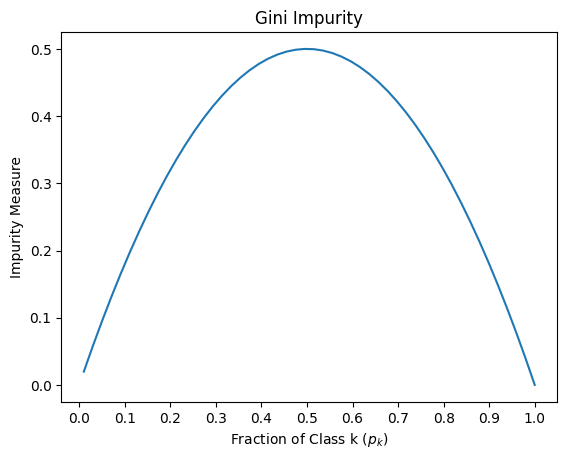

In [ ]:
#A figure is created to show Gini ımpurity measures
plt.figure()
x = np.linspace(0.01,1)
y = 1 - (x*x) - (1-x)*(1-x)
plt.plot(x,y)
plt.title('Gini Impurity')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Impurity Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()

In [ ]:
# Defining a simple dataset
attribute_names =  ['love_math', 'love_art','love_english']
class_name = 'love_ai'
data ={
    'love_math' : ['yes', 'yes', 'no', 'no', 'yes', 'yes','no'],
    'love_art' : ['yes', 'no', 'yes', 'yes', 'yes', 'no', 'no'],
    'love_english' : ['no','no','yes','yes','yes','yes','yes'],
    'love_ai' : ['no','no','yes','yes','yes','no','no']}
df = pd.DataFrame (data, columns=data.keys())
print(df)

  love_math love_art love_english love_ai
0       yes      yes           no      no
1       yes       no           no      no
2        no      yes          yes     yes
3        no      yes          yes     yes
4       yes      yes          yes     yes
5       yes       no          yes      no
6        no       no          yes      no


In [ ]:
# STEP 1: Calculate entire gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = df[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
no     4
yes    3
Name: love_ai, dtype: int64

Gini Impurity of the class is 0.490


In [ ]:
# STEP 2:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df[class_name][df[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for love_math is 0.405
Gini for love_art is 0.214
Gini for love_english is 0.343


In [ ]:
# STEP 3:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.214 
The maximum value of Gini Gain     : 0.786 
The selected attiribute is:  love_art


In [ ]:
df = df[df[selected_attribute] == 'yes']
df = df.drop(selected_attribute, 1)

attribute_names.remove(selected_attribute)
class_name = 'love_ai'

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for love_math is 0.250
Gini for love_english is 0.000


<ipython-input-9-29c1f3b17464>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(selected_attribute, 1)


In [ ]:
# STEP 4:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.
min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.0 
The maximum value of Gini Gain     : 1.0 
The selected attiribute is:  love_english


### Example

In [ ]:
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt

   love_math_yes  love_art_yes  love_english_yes
0              1             1                 0
1              1             0                 0
2              0             1                 1
3              0             1                 1
4              1             1                 1
['no' 'no' 'yes' 'yes' 'yes' 'no' 'no']


[Text(0.4, 0.8333333333333334, 'love_art <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.5, 'love_english <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

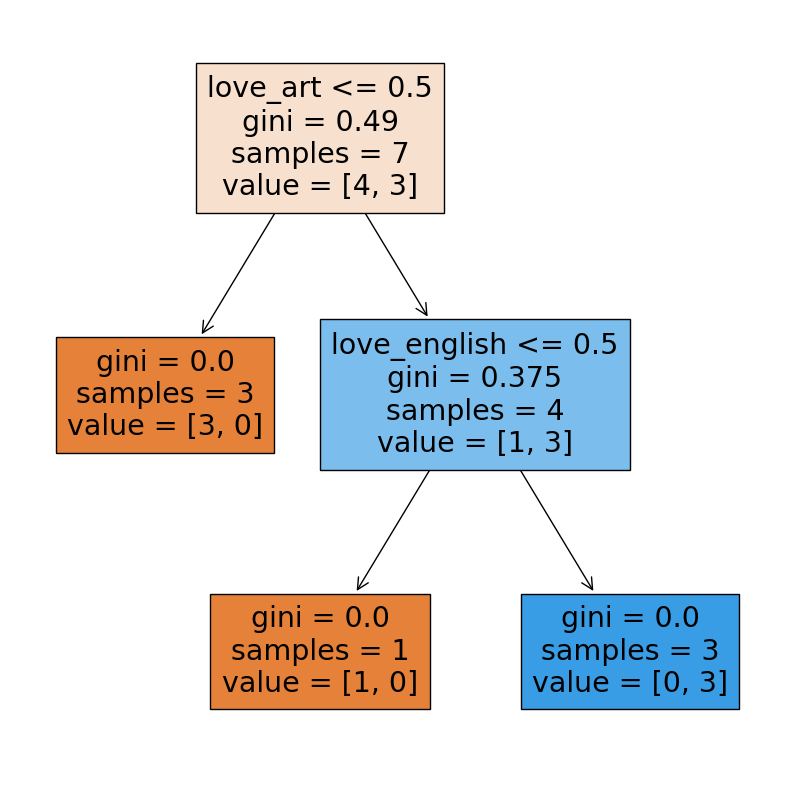

In [ ]:
# Defining a simple dataset
attribute_names =  ['love_math', 'love_art','love_english']
class_name = 'love_ai'
data ={
    'love_math' : ['yes', 'yes', 'no', 'no', 'yes', 'yes','no'],
    'love_art' : ['yes', 'no', 'yes', 'yes', 'yes', 'no', 'no'],
    'love_english' : ['no','no','yes','yes','yes','yes','yes'],
    'love_ai' : ['no','no','yes','yes','yes','no','no']}
df = pd.DataFrame (data, columns=data.keys())

classifier = tree.DecisionTreeClassifier(criterion="gini",
                                         max_depth=4, min_samples_leaf=1)

one_hot_data = pd.get_dummies(df[["love_math", "love_art",
                                                "love_english"]],drop_first=True)
X = one_hot_data.iloc[:,:].values
y = df['love_ai'].values

classifier.fit(X, y)

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(classifier,ax=ax, feature_names=["love_math", "love_art",
                                                "love_english"],
                                                 filled=True)


In [ ]:
result = classifier.predict([[1, 1, 0]])
print(result)


['no']


(150,)


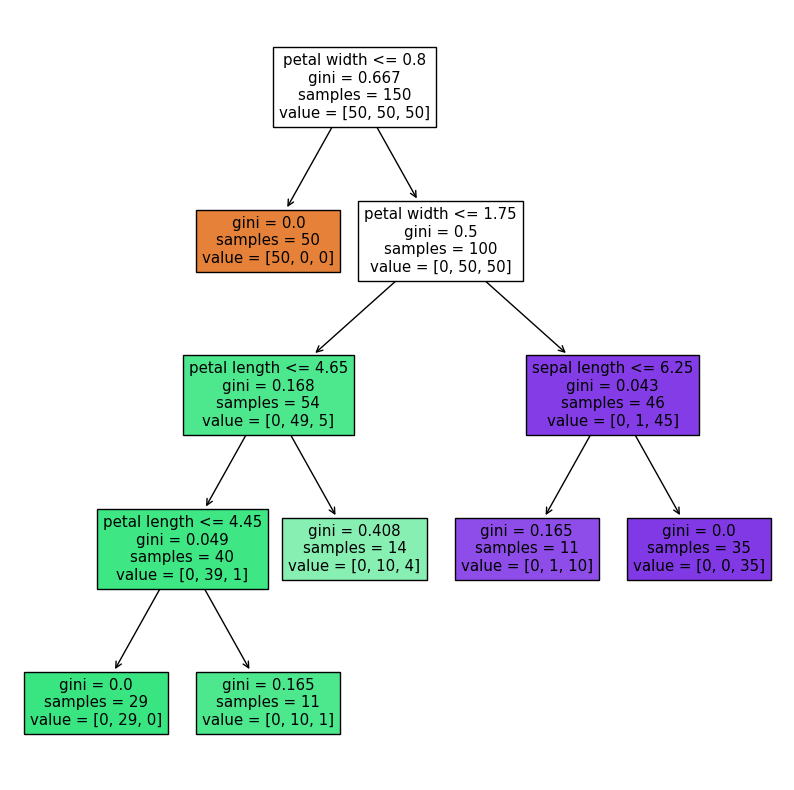

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target
print(y.shape)
classifier = tree.DecisionTreeClassifier(criterion="gini",
                                         max_depth=4, min_samples_leaf=10)
classifier.fit(X,y)
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(classifier,ax=ax, feature_names=["sepal length", "sepal width",
                                                "petal length", "petal width"],
                                                 filled=True)
plt.show()